In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy.stats import norm

## Explore the Data

In [2]:
PATH = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/ai_ready/'
AI_Ready_Path = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/ai_ready/'
ai_ready_file = 'ai_ready_SHIPS_data.csv'

ai_ready_data = pd.read_csv(PATH + ai_ready_file)

In [3]:
ai_ready_data.head()

,Original_Times,Original_Lat,Original_Lon,Original_WSPD,Original_Pres,Name,Code,Times,Latitude,Longitude,Vmax,MSLP,Nature,Delta_Intensity,Daily_SST_Avg,Mid_Level_RH,Vshear,Vert_Vel
0,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,0.0,21.7,87.1,10.28888,1005.0,1.0,0.0,27.1,57.0,15.227542,6.631183
3,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,6.0,22.2,86.5,12.86110,1004.0,0.0,5.0,27.8,53.0,15.536209,3.966363
4,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,12.0,22.6,85.8,15.43332,1003.0,0.0,10.0,27.9,56.0,15.330431,4.403641


## Evaluating the Basic Satistics of the Data

In [7]:
ai_ready_data.describe()

,Original_Lat,Original_Lon,Original_WSPD,Original_Pres,Times,Latitude,Longitude,Vmax,MSLP,Nature,Delta_Intensity,Daily_SST_Avg,Mid_Level_RH,Vshear,Vert_Vel
count,318550.000000,318550.00000,318550.000000,315629.000000,318550.00000,203418.000000,203418.000000,203418.000000,201766.000000,290850.000000,170955.000000,203418.000000,177650.000000,177650.000000,177650.000000
mean,24.735170,63.01078,27.291050,992.087226,54.00000,26.138755,63.548080,30.390374,987.327810,6.702733,5.879939,27.093616,53.853335,13.308224,3.963012
std,8.533635,19.78582,13.248344,19.177188,39.79956,8.328005,18.746773,14.228984,20.946646,11.125932,21.902500,2.453263,10.997244,5.876413,2.434582
min,7.200000,6.00000,5.144440,882.000000,-12.00000,7.200000,6.000000,5.144440,882.000000,0.000000,-115.000000,7.900000,19.000000,2.623664,0.195489
25%,17.400000,47.70000,18.005540,985.000000,18.00000,19.200000,49.000000,18.005540,976.000000,0.000000,-5.000000,26.300000,46.000000,9.054214,2.052632
50%,24.600000,63.10000,23.149980,999.000000,54.00000,26.300000,63.200000,28.294420,994.000000,0.000000,0.000000,27.700000,53.000000,12.295212,3.765730
75%,31.300000,79.10000,33.438860,1006.000000,90.00000,32.500000,78.300000,38.583300,1004.000000,10.000000,15.000000,28.700000,61.000000,16.410764,5.519984
max,51.900000,126.60000,82.311040,1022.000000,120.00000,51.900000,126.600000,82.311040,1022.000000,94.000000,135.000000,31.300000,87.000000,48.512069,13.339533


## Investigating the Distribution of the Data

### Original Wind Speed and Original MSL

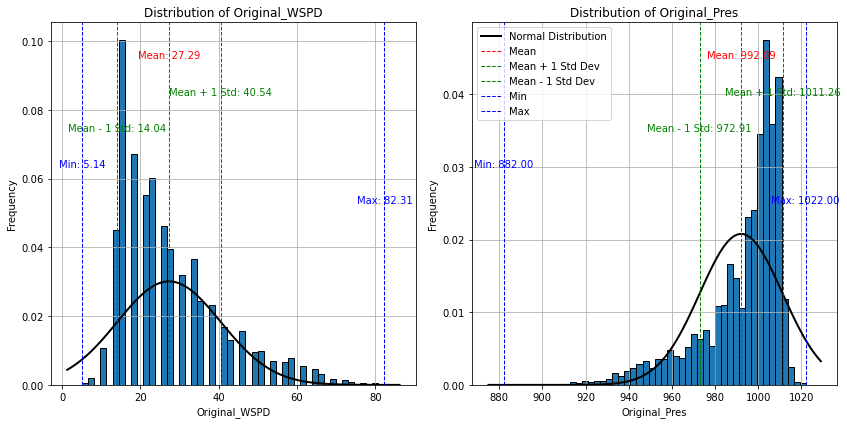

In [4]:
plt.figure(figsize=(12, 6))

# Subplot for Original_WSPD
plt.subplot(1, 2, 1)
data_wspd = ai_ready_data['Original_WSPD'].dropna()
data_wspd.hist(bins=50, edgecolor='black', density=True)
mean_wspd, std_wspd = data_wspd.mean(), data_wspd.std()
xmin_wspd, xmax_wspd = plt.xlim()
x_wspd = np.linspace(xmin_wspd, xmax_wspd, 100)
p_wspd = norm.pdf(x_wspd, mean_wspd, std_wspd)
plt.plot(x_wspd, p_wspd, 'k', linewidth=2)
plt.axvline(mean_wspd, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_wspd + std_wspd, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean_wspd - std_wspd, color='g', linestyle='dashed', linewidth=1)
plt.axvline(data_wspd.min(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data_wspd.max(), color='b', linestyle='dashed', linewidth=1)
plt.text(mean_wspd, plt.ylim()[1]*0.9, f'Mean: {mean_wspd:.2f}', color='r', ha='center')
plt.text(mean_wspd + std_wspd, plt.ylim()[1]*0.8, f'Mean + 1 Std: {mean_wspd + std_wspd:.2f}', color='g', ha='center')
plt.text(mean_wspd - std_wspd, plt.ylim()[1]*0.7, f'Mean - 1 Std: {mean_wspd - std_wspd:.2f}', color='g', ha='center')
plt.text(data_wspd.min(), plt.ylim()[1]*0.6, f'Min: {data_wspd.min():.2f}', color='b', ha='center')
plt.text(data_wspd.max(), plt.ylim()[1]*0.5, f'Max: {data_wspd.max():.2f}', color='b', ha='center')
plt.xlabel('Original_WSPD')
plt.ylabel('Frequency')
plt.title('Distribution of Original_WSPD')

# Subplot for Original_Pres
plt.subplot(1, 2, 2)
data_pres = ai_ready_data['Original_Pres'].dropna()
data_pres.hist(bins=50, edgecolor='black', density=True)
mean_pres, std_pres = data_pres.mean(), data_pres.std()
xmin_pres, xmax_pres = plt.xlim()
x_pres = np.linspace(xmin_pres, xmax_pres, 100)
p_pres = norm.pdf(x_pres, mean_pres, std_pres)
plt.plot(x_pres, p_pres, 'k', linewidth=2)
plt.axvline(mean_pres, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_pres + std_pres, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean_pres - std_pres, color='g', linestyle='dashed', linewidth=1)
plt.axvline(data_pres.min(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data_pres.max(), color='b', linestyle='dashed', linewidth=1)
plt.text(mean_pres, plt.ylim()[1]*0.9, f'Mean: {mean_pres:.2f}', color='r', ha='center')
plt.text(mean_pres + std_pres, plt.ylim()[1]*0.8, f'Mean + 1 Std: {mean_pres + std_pres:.2f}', color='g', ha='center')
plt.text(mean_pres - std_pres, plt.ylim()[1]*0.7, f'Mean - 1 Std: {mean_pres - std_pres:.2f}', color='g', ha='center')
plt.text(data_pres.min(), plt.ylim()[1]*0.6, f'Min: {data_pres.min():.2f}', color='b', ha='center')
plt.text(data_pres.max(), plt.ylim()[1]*0.5, f'Max: {data_pres.max():.2f}', color='b', ha='center')
plt.xlabel('Original_Pres')
plt.ylabel('Frequency')
plt.title('Distribution of Original_Pres')
plt.legend(['Normal Distribution', 'Mean', 'Mean + 1 Std Dev', 'Mean - 1 Std Dev', 'Min', 'Max'])

plt.tight_layout()
plt.show()

### Forecasted Wind Speed and Minimum Sea Level Pressure, SST, Vertival Velocity, Vertical Wind Shear and Mid-level Relative Humidity

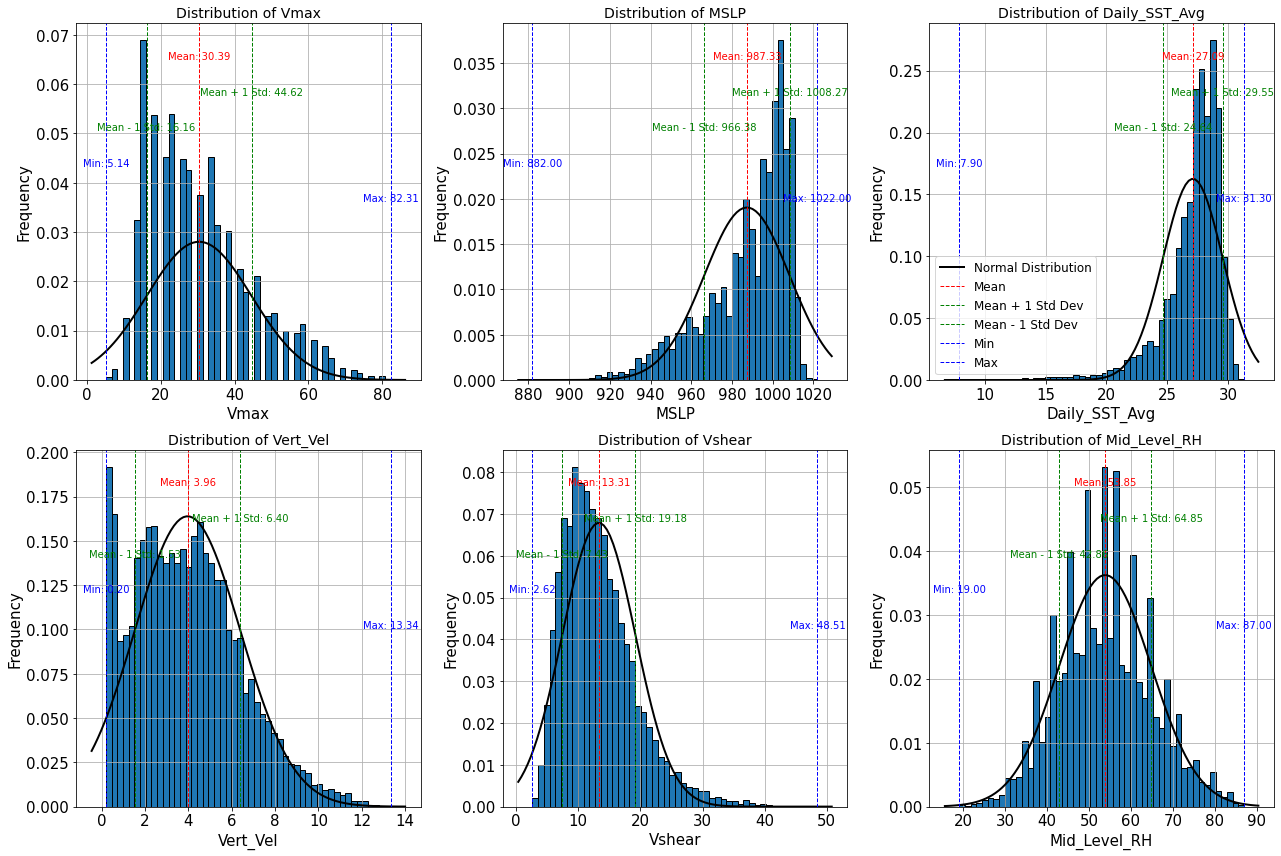

In [13]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

# Define the columns and titles for the subplots
columns = ['Vmax', 'MSLP', 'Daily_SST_Avg', 'Vert_Vel', 'Vshear', 'Mid_Level_RH']
titles = ['Distribution of Vmax', 'Distribution of MSLP', 'Distribution of Daily_SST_Avg', 
          'Distribution of Vert_Vel', 'Distribution of Vshear', 'Distribution of Mid_Level_RH']
xmins = [xmin_vmax, xmin_mslp, xmin_sst, xmin_vert_vel, xmin_vshear, xmin_rh]
xmaxs = [xmax_vmax, xmax_mslp, xmax_sst, xmax_vert_vel, xmax_vshear, xmax_rh]
means = [mean_vmax, mean_mslp, mean_sst, mean_vert_vel, mean_vshear, mean_rh]
stds = [std_vmax, std_mslp, std_sst, std_vert_vel, std_vshear, std_rh]
fontsize = 15
plt.figure(figsize=(18, 12))

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)
    data = ai_ready_data[col].dropna()
    data.hist(bins=50, edgecolor='black', density=True)
    mean, std = means[i], stds[i]
    xmin, xmax = xmins[i], xmaxs[i]
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(data.min(), color='b', linestyle='dashed', linewidth=1)
    plt.axvline(data.max(), color='b', linestyle='dashed', linewidth=1)
    plt.text(mean, plt.ylim()[1]*0.9, f'Mean: {mean:.2f}', color='r', ha='center')
    plt.text(mean + std, plt.ylim()[1]*0.8, f'Mean + 1 Std: {mean + std:.2f}', color='g', ha='center')
    plt.text(mean - std, plt.ylim()[1]*0.7, f'Mean - 1 Std: {mean - std:.2f}', color='g', ha='center')
    plt.text(data.min(), plt.ylim()[1]*0.6, f'Min: {data.min():.2f}', color='b', ha='center')
    plt.text(data.max(), plt.ylim()[1]*0.5, f'Max: {data.max():.2f}', color='b', ha='center')
    plt.xlabel(col, fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    plt.title(titles[i], fontsize=14)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    if i == 2:  # Add legend to the first subplot as an example
        plt.legend(['Normal Distribution', 'Mean', 'Mean + 1 Std Dev', 'Mean - 1 Std Dev', 'Min', 'Max'], 
                   loc='lower left', fontsize=12)

plt.tight_layout()
plt.show()


## Investigating Correlarion

### Use a regular correlation first

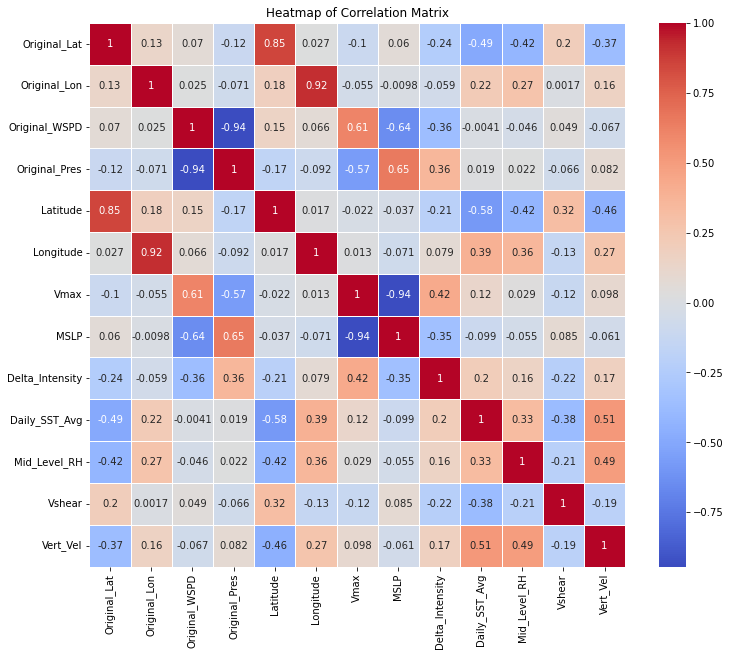

In [21]:
plt.figure(figsize=(12, 10))
correlation_matrix = ai_ready_data.drop(columns=['Times', 'Code', 'Original_Times', 
                                                 'Nature', 'Name']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

There appears to be relationships  between the Daily SST average, Mid level Relative Humidity and the Vertical velocity. There is also a relationship between the MSLP and Vmax. 

### Using a pearson correlation

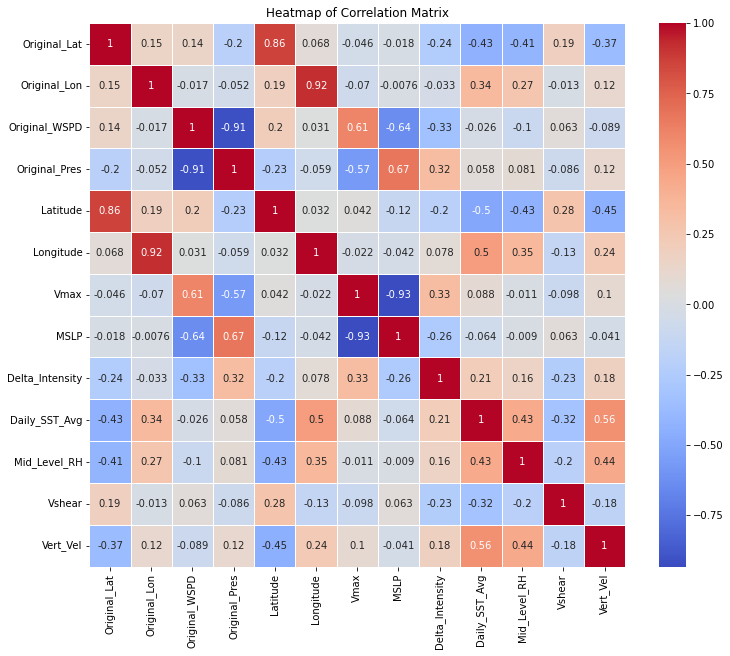

In [10]:
plt.figure(figsize=(12, 10))
correlation_matrix = ai_ready_data.drop(columns=['Times', 'Code', 'Original_Times', 
                                                 'Nature', 'Name']).corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()